In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Salary_Data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,Company_text,job_state,same_state,company age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\r\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\r\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\r\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\r\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\r\n,NY,1,22,1,0,0,0,1


In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'job_state', 'same_state', 'company age', 'python_yn',
       'R_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [4]:
df['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Lead Data Scientist', 'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science', 'Data Science Analyst',
       'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'R&D Data Analy

In [5]:
#job title
#seniority
# JD length
#hourly wage to annual

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'machine learning' in title.lower():
        return 'mle'
    else : return 'n/a'
    
    

In [7]:
def seniority(title):
    if 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'Senior'
    elif 'junior' in title.lower() or 'jr.' in title.lower() or 'jr' in title.lower():
        return 'junior'
    else : return 'n/a'
        
    

In [8]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [9]:
df['job_simp'].value_counts()

data scientist    279
n/a               184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [10]:
df['seniority'] = df['Job Title'].apply(seniority)

In [11]:
df['seniority'].value_counts()

n/a       519
Senior    220
junior      3
Name: seniority, dtype: int64

In [12]:
df['job_state'].unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' DC', ' OH',
       ' AL', ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' NC', ' AZ',
       ' NE', ' MN', ' Los Angeles', ' UT', ' TN', ' DE', ' ID', ' RI',
       ' IA', ' SC', ' KS'], dtype=object)

In [13]:
#Fix Los Angeles
df['job_state'] = df['job_state'].apply(lambda x: 'CA' if x.strip() == 'Los Angeles' else x)

In [14]:
df['job_state'].unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' DC', ' OH',
       ' AL', ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' NC', ' AZ',
       ' NE', ' MN', 'CA', ' UT', ' TN', ' DE', ' ID', ' RI', ' IA',
       ' SC', ' KS'], dtype=object)

In [15]:
# JD length

df['desc_len'] = df['Job Description'].apply(lambda x: len(x))


In [16]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [17]:
#competitor count 

df['comp_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)


In [18]:
#hourly wage to annual wage

df['min_salary'] = df.apply(lambda x: x.min_salary * 2 if x.hourly == 1 else x.min_salary,axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary * 2 if x.hourly == 1 else x.max_salary,axis=1)

In [19]:
df[df.hourly==1][['Salary Estimate', 'min_salary','hourly','max_salary']]

,Salary Estimate,min_salary,hourly,max_salary
165,$17-$24 Per Hour(Glassdoor est.),34,1,48
177,$21-$34 Per Hour(Glassdoor est.),42,1,68
197,$18-$25 Per Hour(Glassdoor est.),36,1,50
202,$21-$34 Per Hour(Glassdoor est.),42,1,68
210,$15-$25 Per Hour(Glassdoor est.),30,1,50
246,$17-$24 Per Hour(Glassdoor est.),34,1,48
271,$21-$34 Per Hour(Glassdoor est.),42,1,68
337,$18-$25 Per Hour(Glassdoor est.),36,1,50
345,$24-$39 Per Hour(Glassdoor est.),48,1,78
357,$21-$34 Per Hour(Glassdoor est.),42,1,68


In [20]:
df['Company_text'] = df['Company_text'].apply(lambda x: x.replace('\n','').replace('\r', ''))

In [21]:
df['Company_text']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Company_text, Length: 742, dtype: object

In [22]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,company age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_len,comp_count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.001348,0.225067,0.237197,0.522911,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.036711,0.417908,0.425651,0.499812,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


In [23]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'job_state', 'same_state', 'company age', 'python_yn',
       'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_len', 'comp_count'],
      dtype='object')

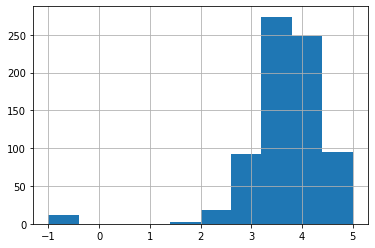

In [25]:
df.Rating.hist()

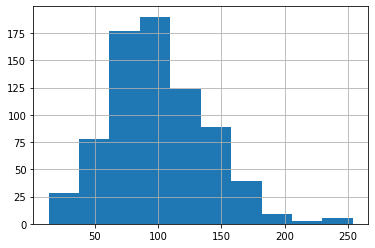

In [26]:
df.avg_salary.hist()

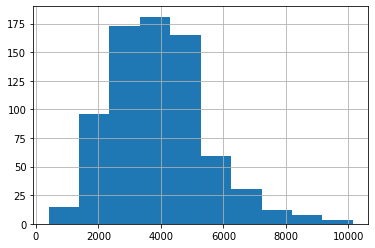

In [27]:
df.desc_len.hist()

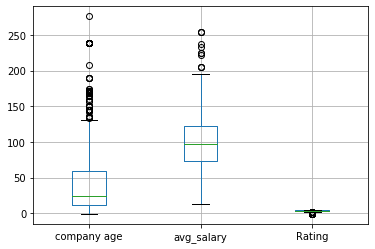

In [32]:
df.boxplot(column=['company age','avg_salary','Rating'])

In [43]:
corr = df[['company age','avg_salary','Rating','desc_len','comp_count']].corr()

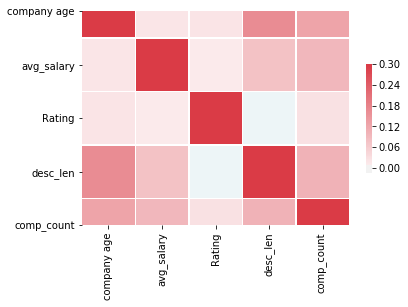

In [44]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [45]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'job_state', 'same_state', 'company age', 'python_yn',
       'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_len', 'comp_count'],
      dtype='object')

In [47]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company_text', 'job_state','same_state', 'python_yn',
       'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

graph for Location: total = 200


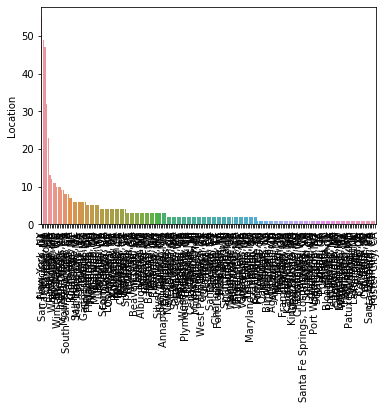

graph for Headquarters: total = 198


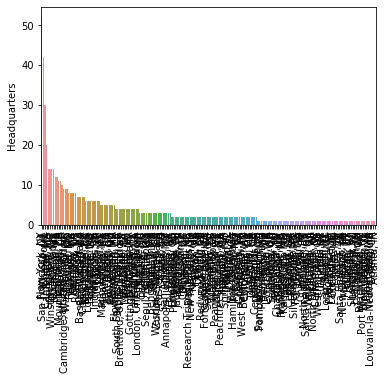

graph for Size: total = 9


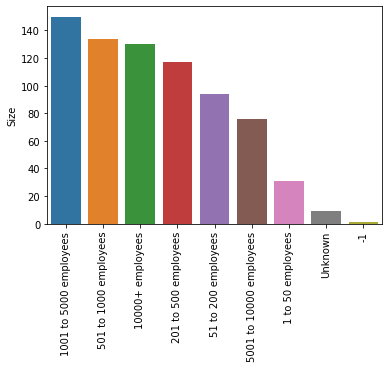

graph for Type of ownership: total = 11


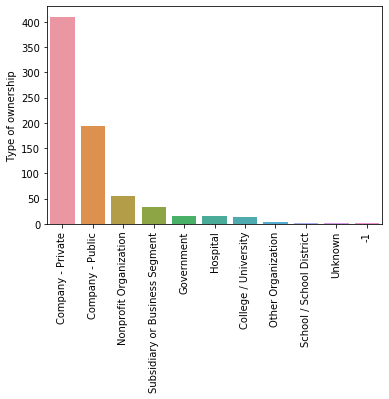

graph for Industry: total = 60


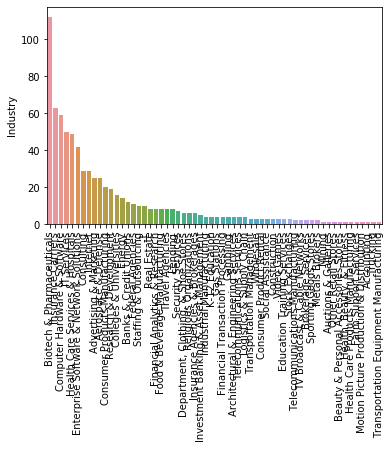

graph for Sector: total = 25


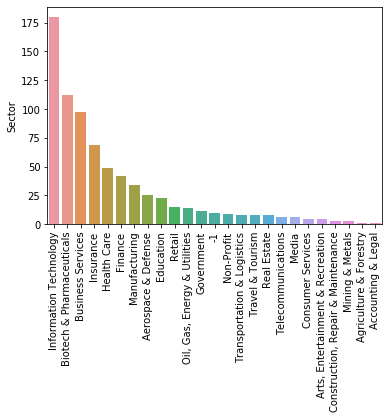

graph for Revenue: total = 14


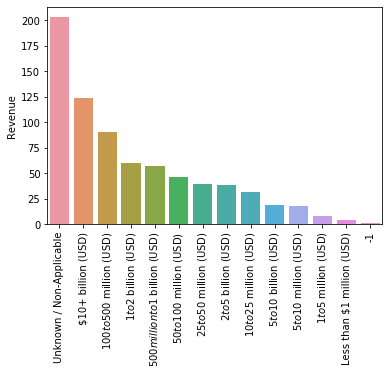

graph for Company_text: total = 343


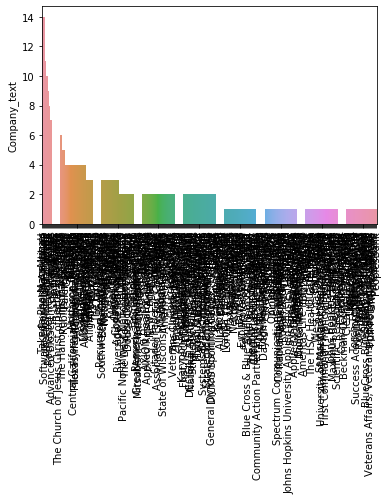

graph for job_state: total = 38


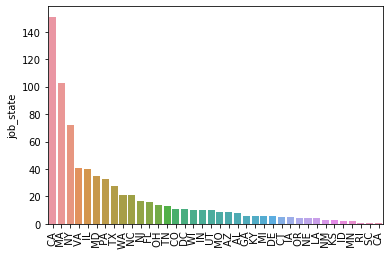

graph for same_state: total = 2


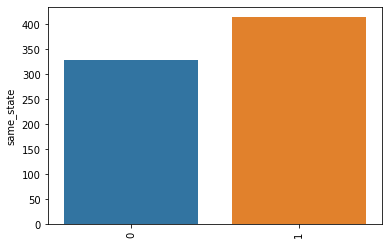

graph for python_yn: total = 2


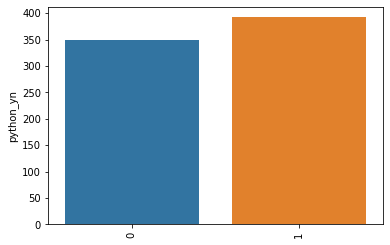

graph for R_yn: total = 2


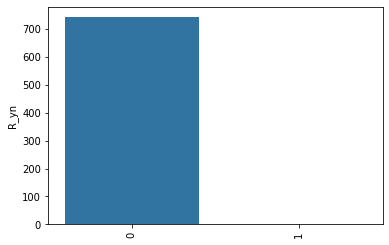

graph for spark_yn: total = 2


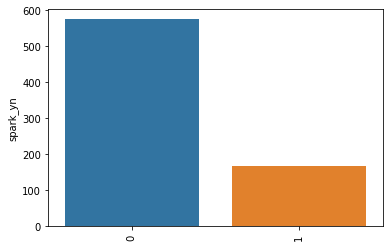

graph for aws_yn: total = 2


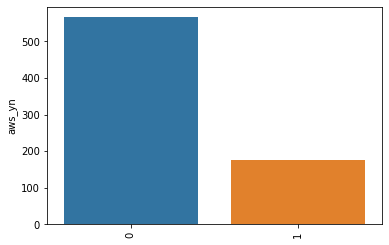

graph for excel_yn: total = 2


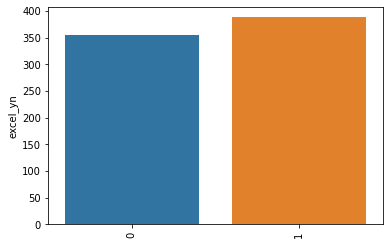

graph for job_simp: total = 7


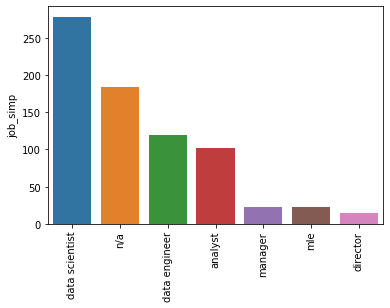

graph for seniority: total = 3


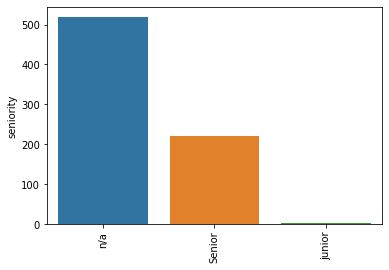

In [55]:
# Looping through columns to generate barplots
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('graph for %s: total = %d' %(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num, data=df_cat)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


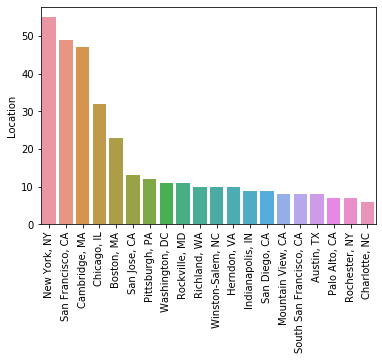

graph for Headquarters: total = 20


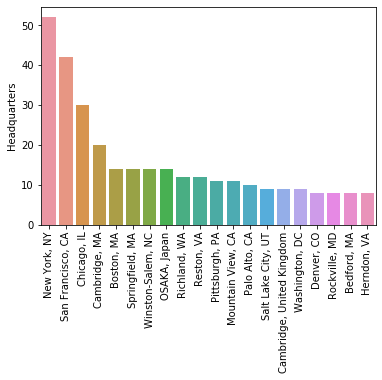

graph for Company_text: total = 20


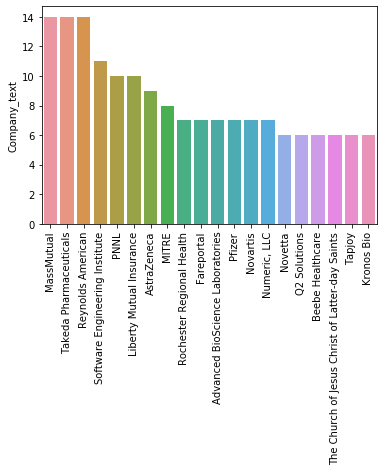

In [57]:
for i in df_cat[['Location', 'Headquarters','Company_text']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('graph for %s: total = %d' %(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num, data=df_cat)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [58]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'job_state', 'same_state', 'company age', 'python_yn',
       'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_len', 'comp_count'],
      dtype='object')

In [59]:
#Pivot Tables
pd.pivot_table(df,index='job_simp',values='avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
n/a,84.853261


In [60]:
pd.pivot_table(df,index=['job_simp','seniority'],values='avg_salary')

avg_salary
job_simp       seniority            
analyst        Senior      79.092593
               junior      53.250000
               n/a         61.308219
data engineer  Senior     124.689189
               n/a         96.701220
data scientist Senior     138.956522
               junior     106.500000
               n/a        107.043011
director       n/a        168.607143
manager        n/a         84.022727
mle            Senior     142.071429
               n/a        119.133333
n/a            Senior     109.061404
               n/a         73.988189

In [69]:
#Display all rows
pd.set_option('display.max_rows',None)

In [75]:
pd.pivot_table(df[df.job_simp=='data scientist'],index=['job_state','job_simp'],values='avg_salary').sort_values('avg_salary',ascending=False)

,,avg_salary
job_state,job_simp,
DC,data scientist,149.000000
CA,data scientist,143.044776
UT,data scientist,140.500000
MO,data scientist,127.666667
IL,data scientist,117.233333
NC,data scientist,117.000000
NY,data scientist,115.250000
MA,data scientist,113.750000
WI,data scientist,113.500000


In [76]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'job_state', 'same_state', 'company age', 'python_yn',
       'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_len', 'comp_count'],
      dtype='object')

In [83]:
# salary by 'Rating','Sector','Size','Industry','Revenue','min_salary', 'max_salary', 'avg_salary','python_yn','R_yn', 'spark_yn', 'aws_yn', 'excel_yn','desc_len','Type of ownership','Headquarters','hourly'

df_pivot = df[[ 'Rating','Sector','Size','Industry','Revenue','min_salary', 'max_salary','python_yn','R_yn', 'spark_yn', 'aws_yn', 'excel_yn','desc_len','Type of ownership','Headquarters','hourly', 'avg_salary']]


In [84]:
for i in df_pivot.columns:
    print(i)
    print(pd.pivot_table(df_pivot,index=i,values='avg_salary').sort_values('avg_salary',ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Sector
                                    avg_salary
Sector                                        
Media                               116.666667
-1                                  114.650000
Accounting & Legal                  113.500000
Information Technology              113.191667
Biotech & Pharmaceuticals           111.767857
Insurance                     

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [86]:
pd.pivot_table(df_pivot,index = 'Revenue', columns='python_yn',values='avg_salary',aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [95]:
!pip3 install wordcloud
!pip3 install nltk
import nltk
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

You should consider upgrading via the 'c:\users\harpreet.singh\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\harpreet.singh\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [98]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Harpreet.Singh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

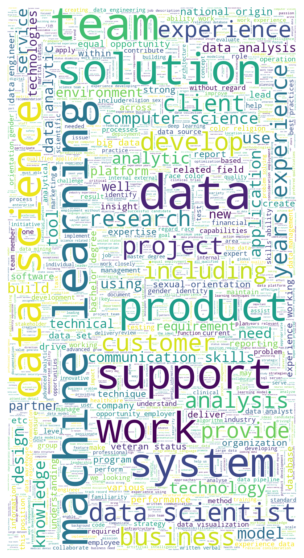

In [100]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()